# BIKE SHARING CASE STUDY

## PROBLEM STATEMENT

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.\

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. \

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.\

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends.\

The company wants to know:

- *Which variables are significant in predicting the demand for shared bikes.*
- *How well those variables describe the bike demands*

## Step 1: Reading the Data

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings                                        #to avoid warning pop-ups
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Determining the number of rows and columns
bike.shape

(730, 16)

In [4]:
#Descripion of all the numerical columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Checking data types and null values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### There are no missing values in our data

## * Cleaning and Updating the Data

In [6]:
# We can see the dataset has some variables that are not required. We can drop instant, dteday, casual, registered

bike=bike.drop(['instant','dteday','casual', 'registered'], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Mapping the Variables

In [7]:
#Mapping variables season, month, weathersit, weekday

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 2: Visualizing and Undersanding the Data

### Numeric variables

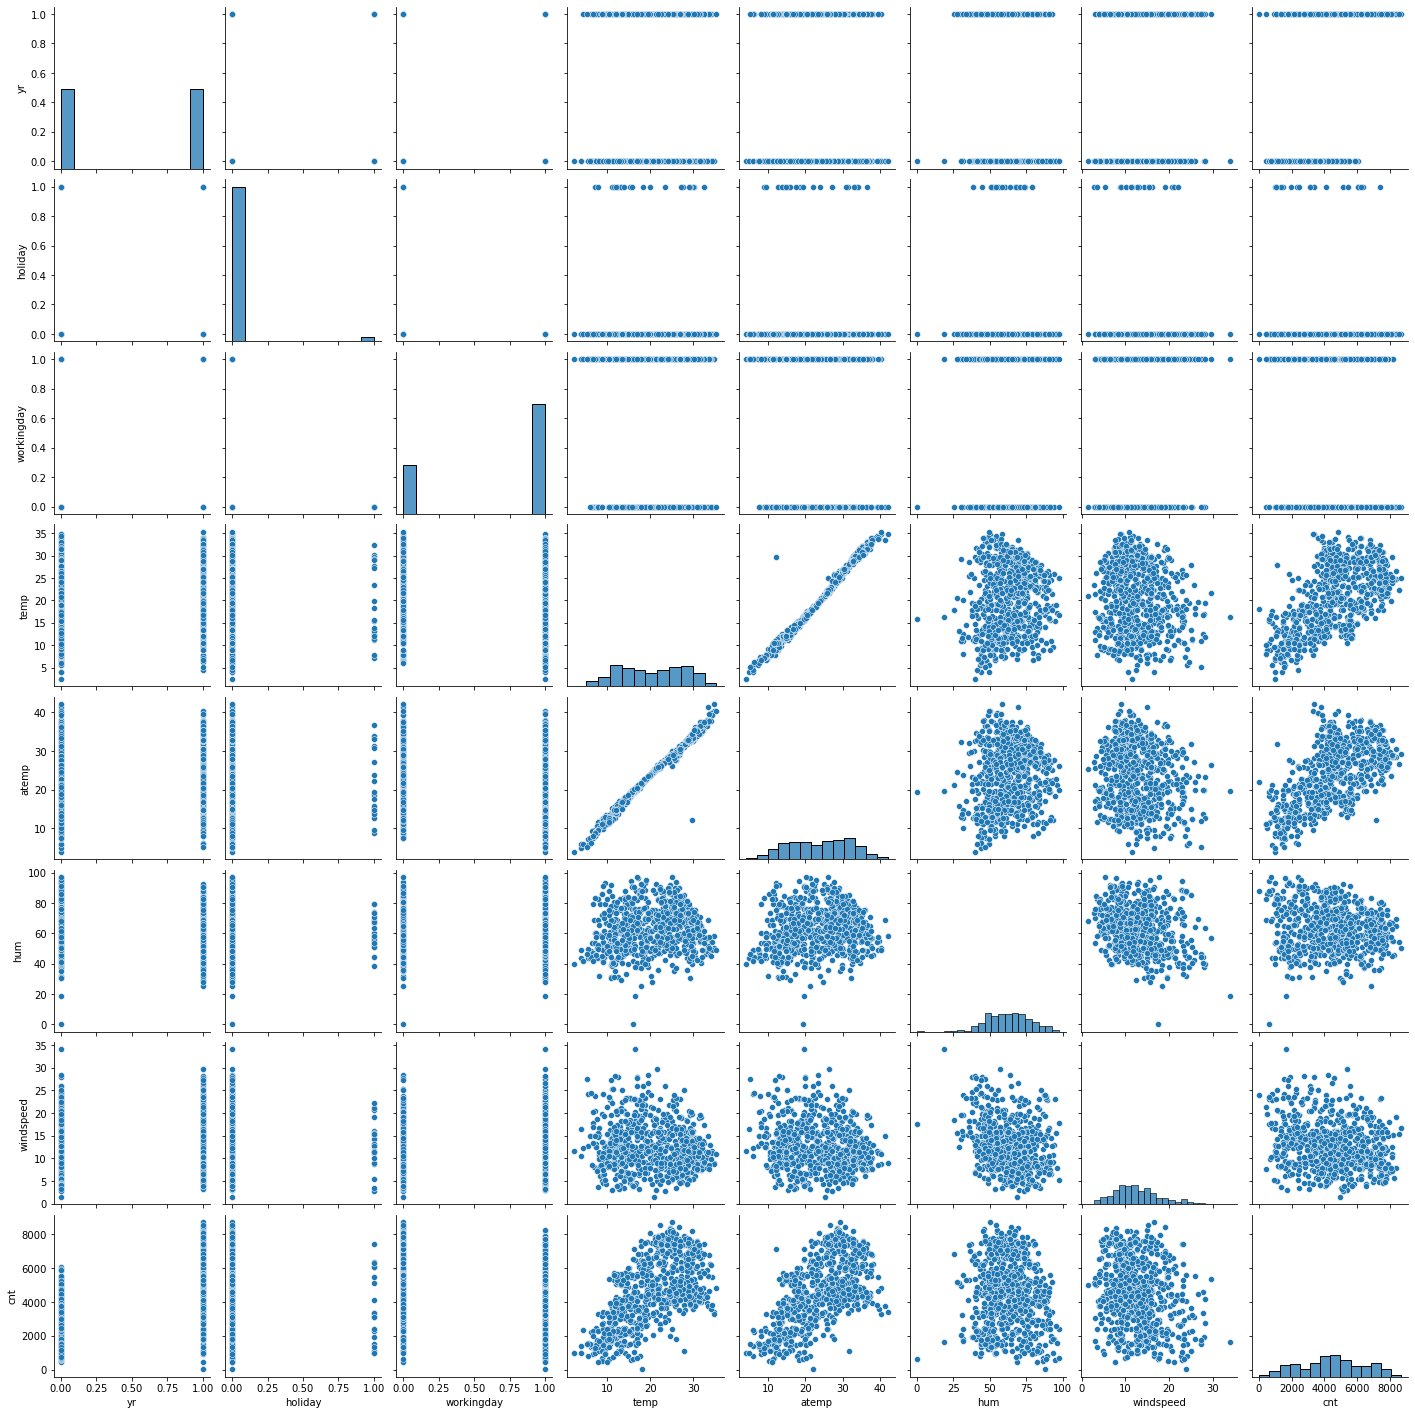

In [8]:
sns.pairplot(bike)
plt.show()

From this pair-plot we infer that:
- There seems to be a high relation between Count, Temperature and Atemp. 

Since, we cannot comprehend the relation between count, yr, holiday and workingday (as they are binary and hard to read), let's visualize them in the form of boxplots along with the categorical variables.

### Visualizing the Categorical variables

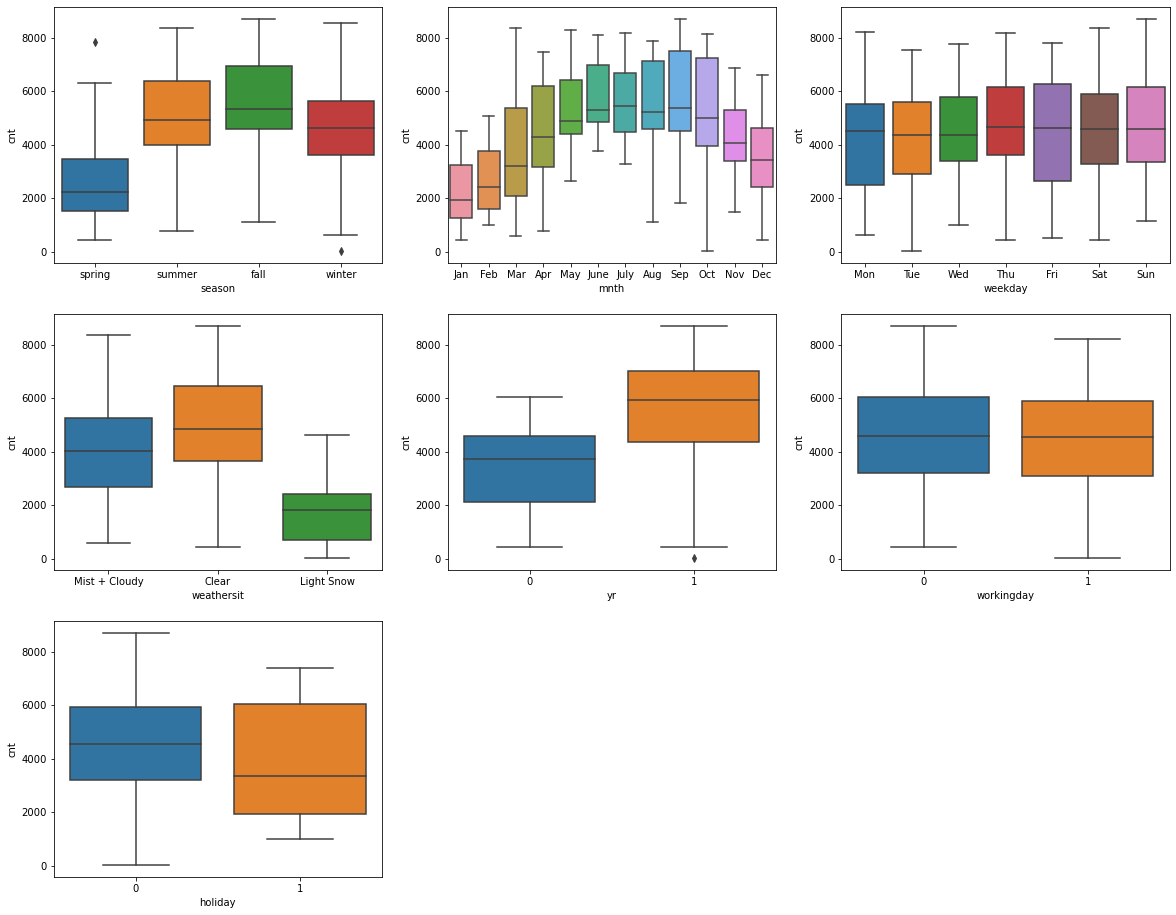

In [9]:
#Visualizing the categoricl data
plt.figure(figsize=(20, 16))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

Interestingly, we infer that:
- Highest count of bikes are rent during `Fall season`.
- More bikes are rented during `September`
- Whether it's weekend or weekdays, number of bike rents remain steady throughout the week.
- Most bikes are rented during `Clear Weather`.
- There was an increase in bike rents in `2019` as compared to 2018.
- Holiday box-plot sees a drop in the median of the count.

### Heatmap

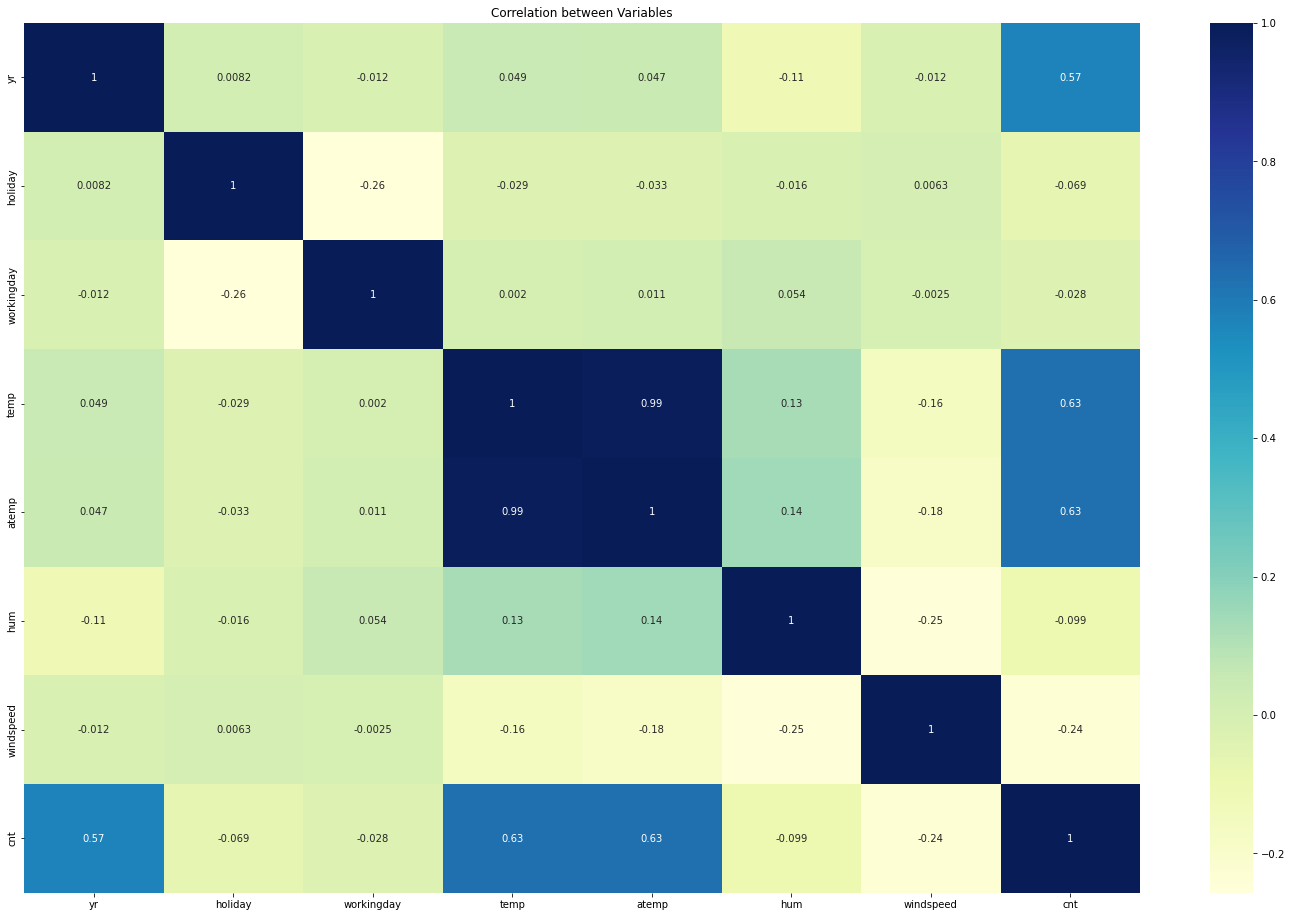

In [10]:
plt.figure(figsize=(25, 16))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation between Variables")
plt.show()

We see there's a high correlation between count and temperature (0.63!) \
There's also positive correlation between count and Year

Temperature and atemp seem to have high collinearity (will need to run a VIF check here)

## Step 3: Preparing the Data for Modelling

### Dummy Variables

We will need to create Dummy Variables for month, season, weathersit and weekday

In [11]:
# Dummy variables for month, season, weathersit, weekday

months=pd.get_dummies(bike.mnth,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

# Concatenating them to the original dataframe
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Dropping 'season','month','weekday','weathersit' since we already have the dummies

bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#Number of rows and columns
bike.shape

(730, 30)

Thus, now we have the data where all variables are numeric and can be worked with

## Splitting the data into test and training set

In [14]:
# W'll split the data 70-30
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [15]:
#Rows and columns after split

print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


# Step 4: Rescaling the features

### Min-Max scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#list of numeric variables
num_vars=['temp','atemp','hum','windspeed','cnt']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095


In [17]:
#Checking numeric variables(min and max) after scaling
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


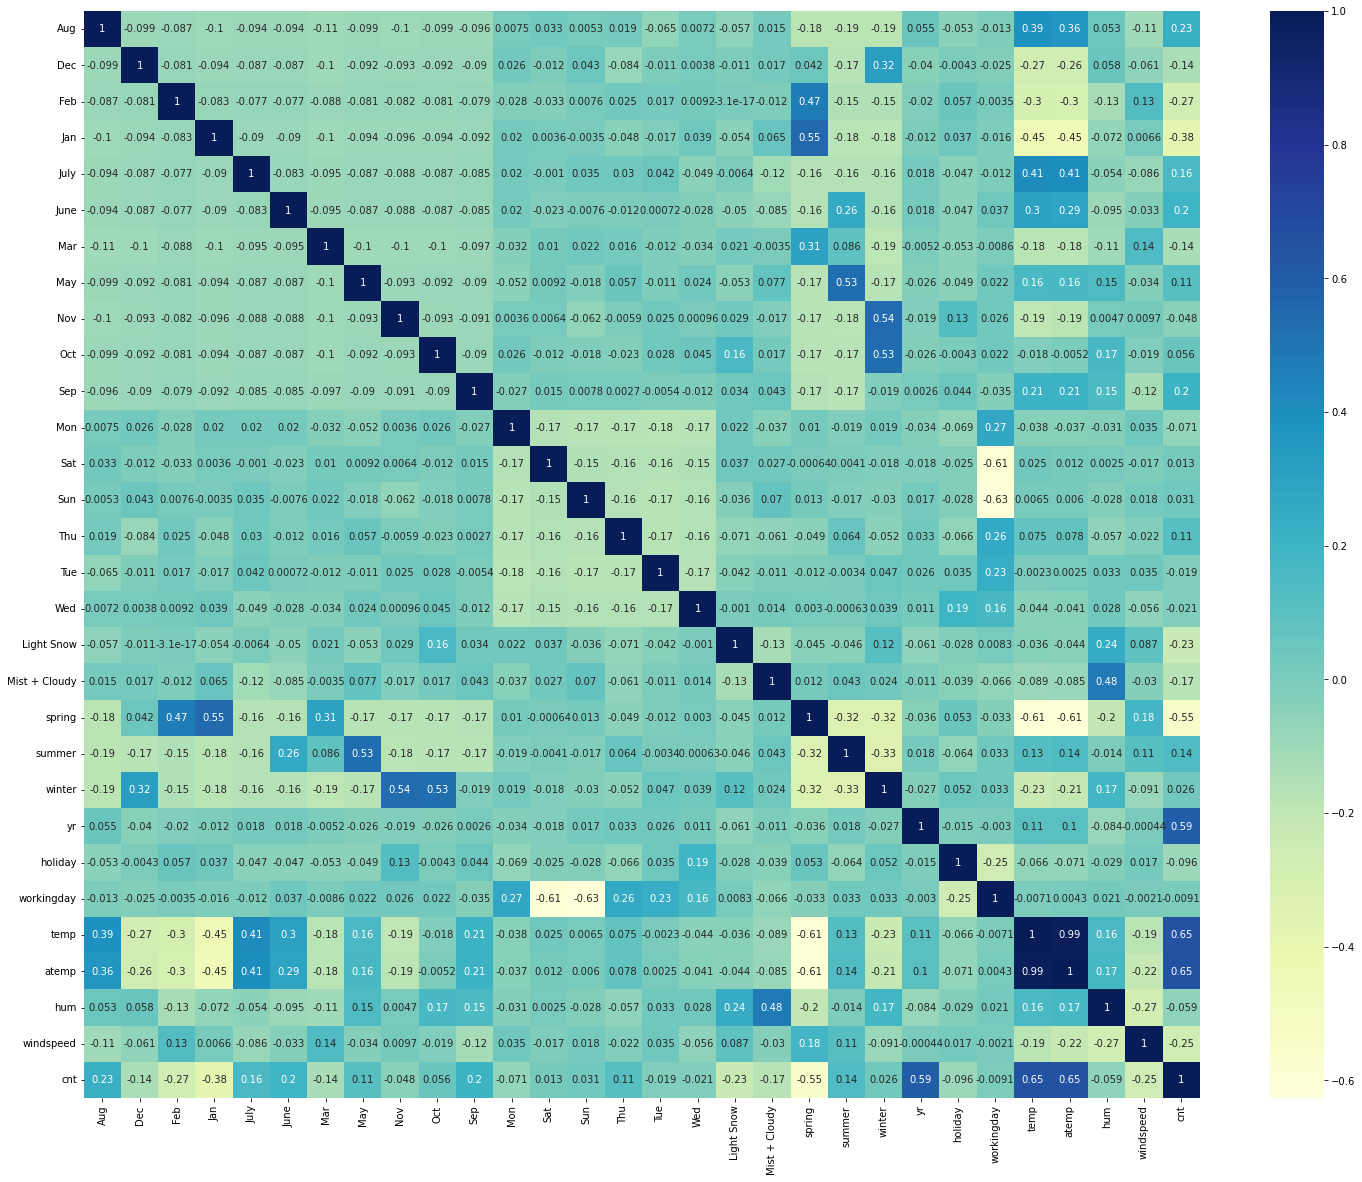

In [18]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Inference: Temperature, Summer season, June-October months, Thurday, Year have a positive correlation with the count variable

### Dividing into X and Y sets for data modelling 

In [19]:
#Divide the data into X and y
y_train = bike_train.pop('cnt')
X_train = bike_train

# Step 5: Building a Linear Model

## Using RFE

In [20]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [21]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,step=15)           # running RFE
rfe = rfe.fit(X_train, y_train)

In [22]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 2),
 ('Dec', False, 2),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 2),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 2),
 ('Tue', False, 2),
 ('Wed', False, 2),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [23]:
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'winter',
       'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [24]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed', 'spring', 'summer'],
      dtype='object')

In [25]:
X_train_rfe = X_train[col]

In [26]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [27]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [28]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     160.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          7.63e-174
Time:                        20:24:39   Log-Likelihood:                 475.75
No. Observations:                 510   AIC:                            -921.5
Df Residuals:                     495   BIC:                            -858.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3005      0.082      3.663

In [29]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [30]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,356.17
10,temp,345.80
12,hum,35.54
9,workingday,30.61
3,Sun,6.39
2,Sat,6.08
13,windspeed,5.38
5,Mist + Cloudy,2.36
7,yr,2.07
8,holiday,1.76


## Model I

Right off the bat we see 'atemp'  has an extemely high VIF. Let's drop atemp and see how it affects the VIF

In [31]:
X_train_new1 = X_train_rfe.drop(["atemp"], axis = 1)

In [32]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     173.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          8.09e-175
Time:                        20:24:39   Log-Likelihood:                 475.39
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     496   BIC:                            -863.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3024      0.082      3.689

In [33]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [34]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,hum,35.32
9,workingday,30.41
10,temp,11.27
3,Sun,6.35
2,Sat,6.07
12,windspeed,5.23
5,Mist + Cloudy,2.36
7,yr,2.07
8,holiday,1.76
6,winter,1.73


Much better, next we'll drop 'hum' which has a high VIF

## Model II

In [35]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["hum"], axis = 1)

In [36]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     182.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.11e-173
Time:                        20:24:39   Log-Likelihood:                 468.90
No. Observations:                 510   AIC:                            -911.8
Df Residuals:                     497   BIC:                            -856.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2102      0.079      2.670

In [37]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [38]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,workingday,14.94
10,temp,10.27
11,windspeed,4.97
3,Sun,3.69
2,Sat,3.52
7,yr,2.06
6,winter,1.66
5,Mist + Cloudy,1.58
0,Jan,1.54
8,holiday,1.35


We observe that the p-values of a few variables have gone up. VIF of workingday is quite high.

## Model III

In [39]:
#Drop workingday
X_train_new3 = X_train_lm2.drop(["workingday"], axis = 1)

In [40]:
#Build a model
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     199.1
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.34e-174
Time:                        20:24:39   Log-Likelihood:                 468.82
No. Observations:                 510   AIC:                            -913.6
Df Residuals:                     498   BIC:                            -862.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1790      0.020      8.788

In [41]:
#Drop the constant
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [42]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,3.70
10,windspeed,3.17
7,yr,2.03
5,Mist + Cloudy,1.52
6,winter,1.29
3,Sun,1.19
0,Jan,1.18
2,Sat,1.17
1,Sep,1.16
4,Light Snow,1.08


## Model IV

In [43]:
# Although Sat/Sun, don't have high VIF, it seems their p-value is high - they're insignificant

In [44]:
#Drop Windspeed
X_train_new4 = X_train_lm3.drop(["Sat"], axis = 1)

In [45]:
#Build a model
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     218.6
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.30e-175
Time:                        20:24:39   Log-Likelihood:                 468.03
No. Observations:                 510   AIC:                            -914.1
Df Residuals:                     499   BIC:                            -867.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1811      0.020      8.916

In [46]:
#Drop the constant
X_train_lm4 =X_train_lm4.drop(['const'],axis=1)

In [47]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,3.61
9,windspeed,3.17
6,yr,2.03
4,Mist + Cloudy,1.52
5,winter,1.29
0,Jan,1.17
1,Sep,1.16
2,Sun,1.16
3,Light Snow,1.08
7,holiday,1.04


## Model V

In [48]:
#Drop Sat
X_train_new5 = X_train_lm4.drop(["Sun"], axis = 1)

In [49]:
#Build a model
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     242.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          5.27e-176
Time:                        20:24:40   Log-Likelihood:                 467.07
No. Observations:                 510   AIC:                            -914.1
Df Residuals:                     500   BIC:                            -871.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1831      0.020      9.026

In [50]:
#Drop the constant
X_train_lm5 =X_train_lm5.drop(['const'],axis=1)

In [51]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,3.57
8,windspeed,3.15
5,yr,2.03
3,Mist + Cloudy,1.50
4,winter,1.29
0,Jan,1.17
1,Sep,1.16
2,Light Snow,1.08
6,holiday,1.04


Across these models we have dropped the variables - atemp, hum , workingday, Sat and Sun.

- We now observe that all our p-values present are significant
- We have a great R-Square (81%) and Adjusted R-square (81%)
- Even our VIF is within the acceptable range i.e <5
- This Concludes our **FINAL MODEL**

Let's move on to the final leg i.e:
-  Residual Analysis (error checking)
-  Running our model on test set and Evaluating the model

# Step 6: Residual Analysis

In [52]:
X_train_lm5 = sm.add_constant(X_train_new5) #adding it again since we dropped it for VIF

In [53]:
y_train_pred = lm5.predict(X_train_lm5)

<Figure size 432x288 with 0 Axes>

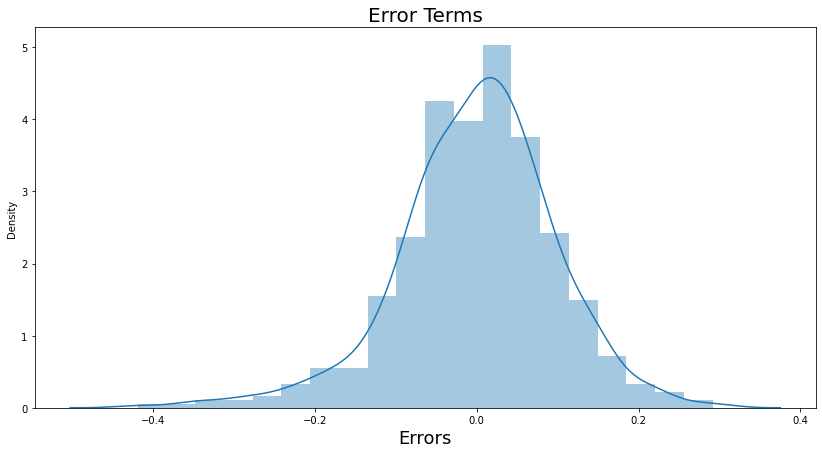

In [54]:
fig = plt.figure()

plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)

plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

Distribution is centered around 0. Model is fit for testing

# Step 7: Making Predictions

In [55]:
num_vars=['temp','atemp','hum','windspeed','cnt']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029


In [56]:
#Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474


In [57]:
X_train_new5.columns

Index(['Jan', 'Sep', 'Light Snow', 'Mist + Cloudy', 'winter', 'yr', 'holiday',
       'temp', 'windspeed'],
      dtype='object')

### Now that the test data is set, let's use our model to make predictions

In [58]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Jan,Sep,Light Snow,Mist + Cloudy,winter,yr,holiday,temp,windspeed
184,1.0,0,0,0,1,0,0,1,0.831783,0.084219
535,1.0,0,0,0,0,0,1,0,0.901354,0.153728
299,1.0,0,0,0,1,1,0,0,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0.881625,0.339570
152,1.0,0,0,0,0,0,0,0,0.817246,0.537414


In [59]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

# Step 8 : Model Evaluation

## Finding R-square

In [60]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
print('Train R-Score: ' ,r2_score(y_train,y_train_pred))  # R score for train data
print('Test R-Score: ' ,r2_score(y_test, y_pred))

Train R-Score:  0.8134586826753891
Test R-Score:  0.7693243161001955


### Creating a regression plot

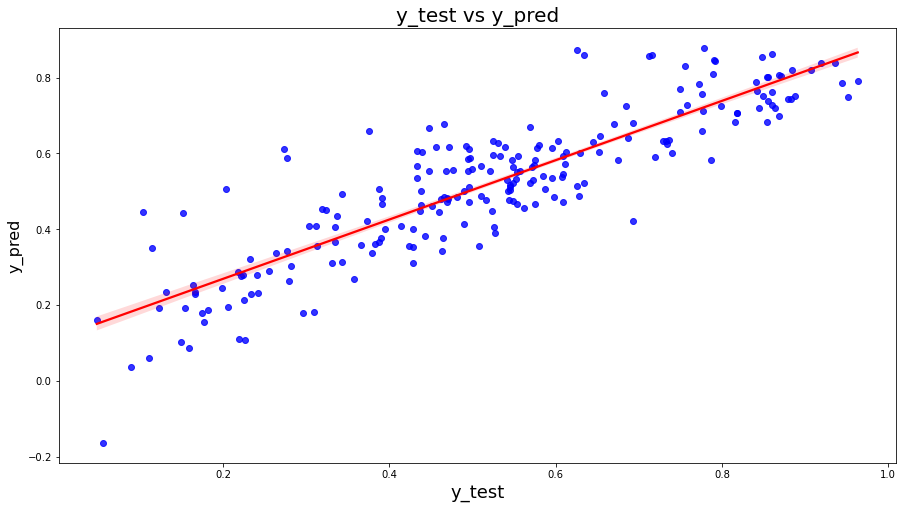

In [61]:
# We'll create a scatter regression plot using sns
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### That conclues our model building and testing.
***

# Conclusion

If we go back to our problem statement, the company wanted to know about two factors:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

Answer:

### 1) Variables that are significant in predicting the demand for shared bikes

- Positive co-relation
  - Sep 
  - winter
  - yr
  - temp
- Negative co-relation
  - Jan 
  - Light Snow
  - Mist + Cloudy
  - holiday
  
We've observed that the most bike-rentals happen when the weather is Clear, during Fall season (September!) and during weekdays (esp. Thursday).

### 2) How well those variables describe the bike demands is best described by:

#### Equation of our best fitted line:

 `count` = *0.0824 $x$ Sep $+$ 0.0983 $x$ Winter $+$ 0.2330 $x$ Year $+$  0.5420 $x$ Temp $+$ ($-$0.0663) $x$ Jan $+$ ($-$0.2999) $x$ Light Snow $+$ ($-$0.0706) $x$ Mist + Cloudy $+$ ($-$0.1066) $x$ Holiday* $+$ ($-$0.1507) $x$ Windspeed*
 
***
***
